- KPCA 降维原理
核主成分分析，是对于输入空间中的矩阵X，先用一个非线性映射把X中的所有样本映射到一个高维甚至无穷维的空间

In [7]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib as mpl

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

In [4]:
# 解決中文亂碼及負號顯示錯亂問題
mpl.rcParams['font.family'] = ['STSong']
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
wine_x, wine_y = datasets.load_wine(return_X_y=True)
wine_x = StandardScaler().fit_transform(wine_x)

In [6]:
print(wine_x.shape, wine_y)

(178, 13) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


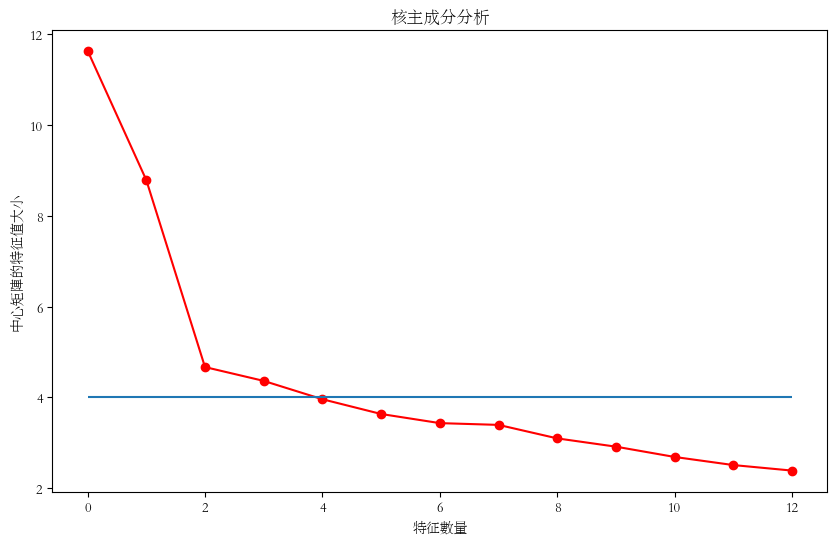

In [10]:
#KPCA 降維並數據可視化
import matplotlib.pyplot as plt

#使用KPCA獲取數據的主成分
kpca = KernelPCA(n_components=13, kernel='rbf', gamma=0.2, random_state=123)
kpca.fit(wine_x)

#可視化PCA的中心矩陣特征值
lambdas = kpca.eigenvalues_ #kpca.lambdas_
plt.figure(figsize=(10,6))
plt.plot(lambdas, 'r-o') # r指的是每一個節點的顏色，'-'指的是節點與節點連接的線條形狀，'o'是代表circle，指的是節點的形狀
plt.hlines(y=4,xmax=12,xmin=0)
plt.xlabel("特征數量")
plt.ylabel("中心矩陣的特征值大小")
plt.title("核主成分分析")
plt.show()

In [11]:
# 獲取前3個核主成分
kpca_wine_x = kpca.transform(wine_x)[:,:3]
kpca_wine_x.shape

(178, 3)

Text(0.5, 0, '核主成分3')

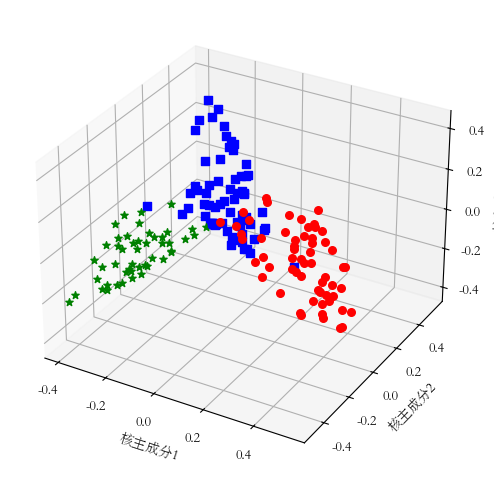

In [12]:
# 在3D空間中可視化KPCA分析後的數據分佈
colors = ['red','blue','green']
shapes = ['o','s','*']
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111, projection='3d')
for ii,y in enumerate(wine_y):
    ax1.scatter(kpca_wine_x[ii,0],kpca_wine_x[ii,1],kpca_wine_x[ii,2],
                s=30, c=colors[y],marker=shapes[y])
ax1.set_xlabel("核主成分1",rotation=20)
ax1.set_ylabel("核主成分2",rotation=60)
ax1.set_zlabel("核主成分3",rotation=90)